# Cement Strength Prediction Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd

In [3]:
### Loading/reading the dataset from url

Dataset = "concrete_data_original.csv"

Data = pd.read_csv(Dataset)

Data.head()



,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
## No of records(1030) and Features(9)
Data.shape

(1030, 9)

In [5]:
## Brief info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [18]:
## Feature Names
Feature_names = list(Data.columns)
Feature_names

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age',
 'concrete_compressive_strength']

In [7]:
## Checking null values
Data.isna().sum()
## No Null values

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
## Checking null values
Data.isnull().sum()
## No Null values

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
## Checking for Correlation
Data.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


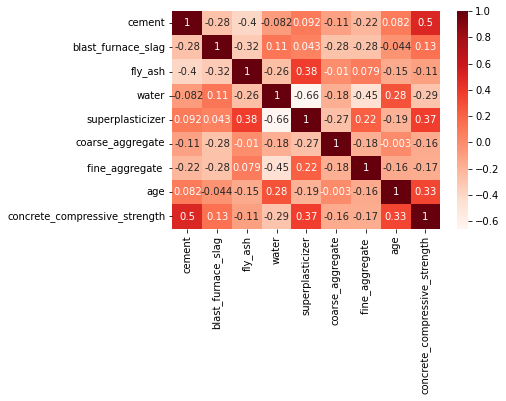

In [18]:
corr = Data.corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

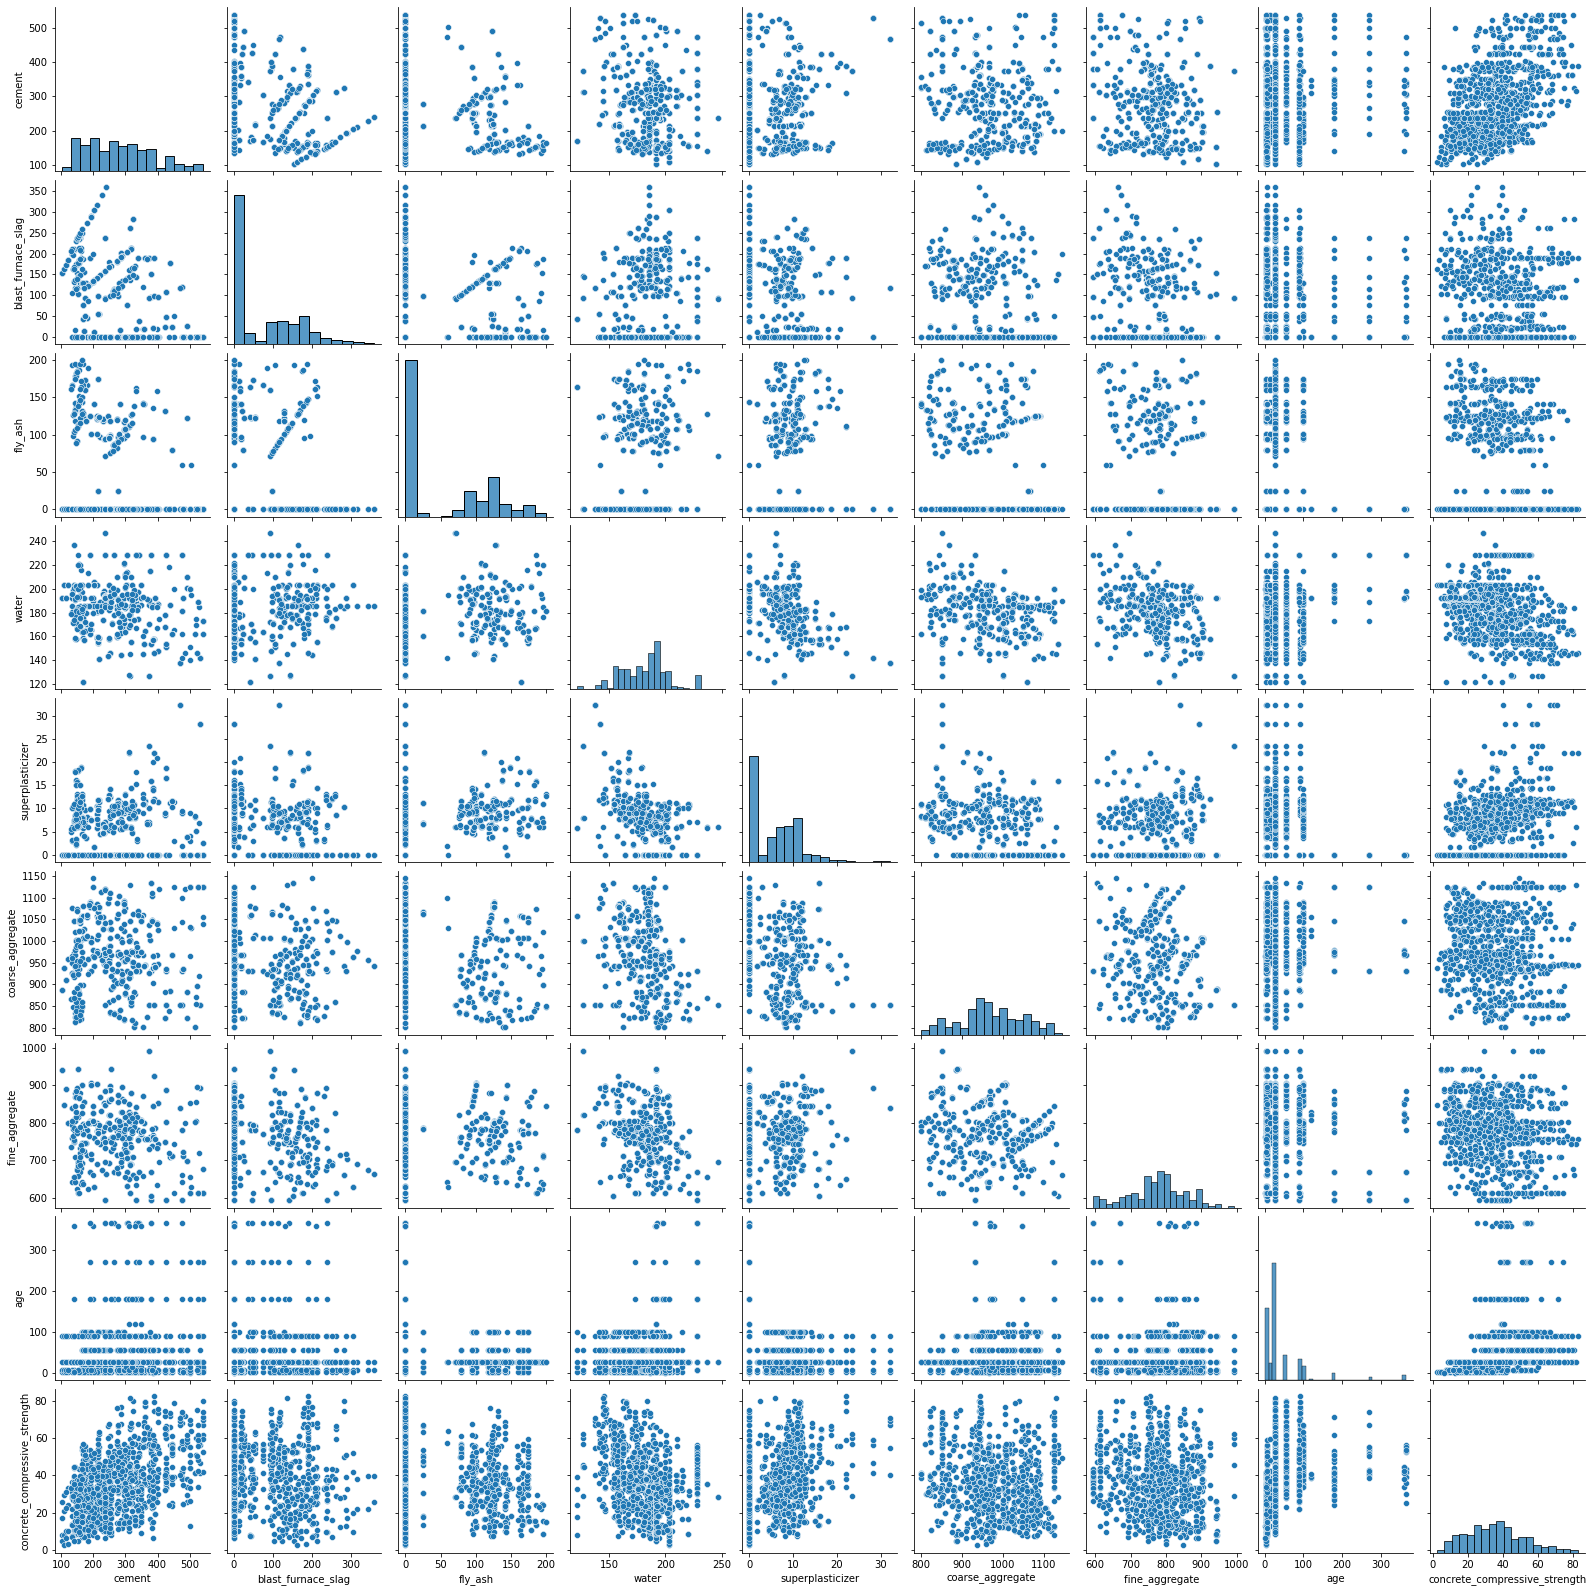

In [20]:
sns.pairplot(Data)
plt.show()

# ------------------------------------------------------------------------------------------------------------------

# Indenpendent Features / Predictors

In [21]:
Independent_features = Data.drop(labels="concrete_compressive_strength",axis=1)
Independent_features


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# Dependent feature / Response / Output_feature

In [22]:
Dependent_feature = Data["concrete_compressive_strength"]
Dependent_feature


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

# -----------------------------------------------------------------------------------------------------------------

# Splitting the dataset into train data and test data 

In [23]:
X_train , X_test, y_train , y_test = train_test_split(Independent_features , Dependent_feature , test_size=0.20,random_state=42)

## Our training dataset

In [24]:

X_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [26]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: concrete_compressive_strength, Length: 824, dtype: float64

## ## Our testing dataset

In [25]:
X_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [27]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: concrete_compressive_strength, Length: 206, dtype: float64

# ----------------------------------------------------------------------------------------------------------------

## Outlier Detection using Boxplot

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


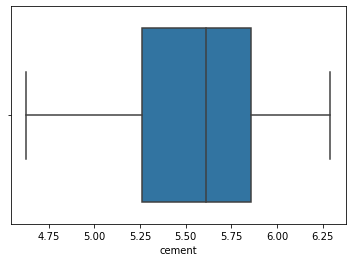

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


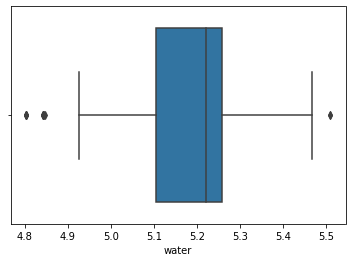

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


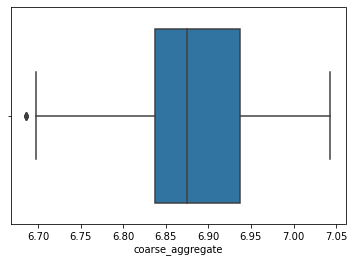

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


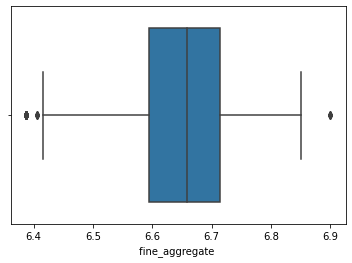

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


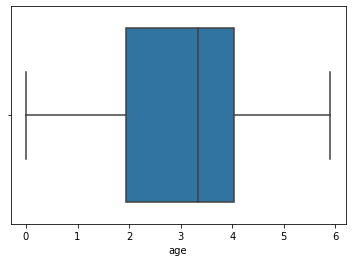

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


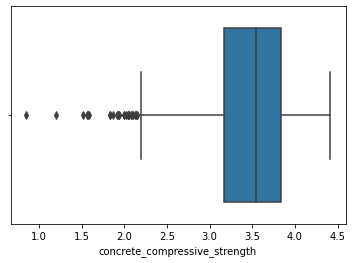

In [23]:
data = Data.copy()

for features_names in Feature_names:
    if 0 in data[features_names].unique():
        pass
    else :
        data[features_names] =np.log(data[features_names])
        sns.boxplot(data[features_names])  ## or sns.boxplot(data = data[features_names]) 
        plt.xlabel(features_names)
        plt.show()
    
    
## Our Target features Compressive strength has missing values

<AxesSubplot:>

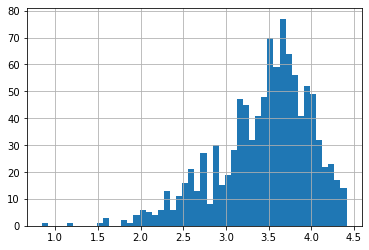

In [27]:
data.concrete_compressive_strength.hist(bins=50)

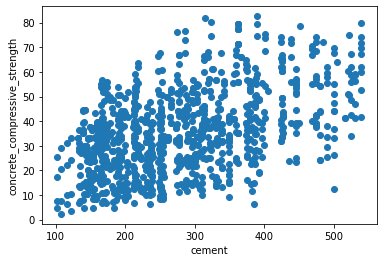

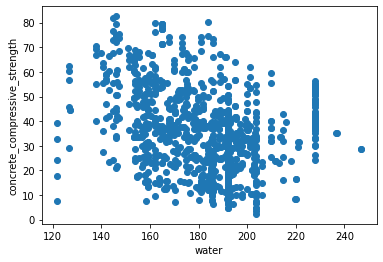

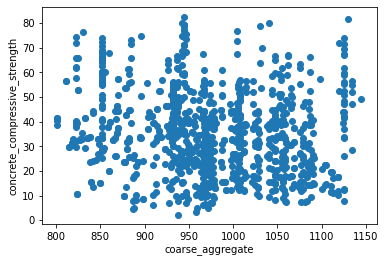

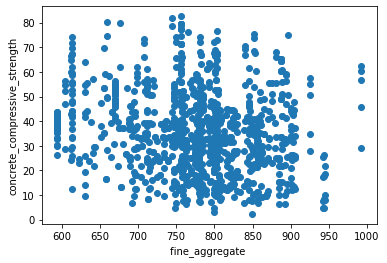

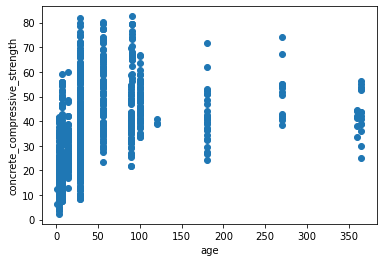

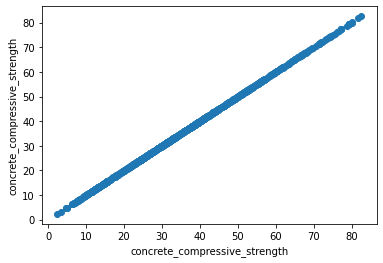

In [37]:
data = Data.copy()

for features_names in Feature_names:
    if 0 in data[features_names].unique():
        pass
    else :
       
        plt.scatter(x=data[features_names],y=data["concrete_compressive_strength"])
        plt.xlabel(features_names)
        plt.ylabel("concrete_compressive_strength")
        plt.show()
    

## Doing Stratified Split

### Docs: From sklearn 
split = StratifiedShuffleSplit()
split.split(X, y,groups)

Parameters:

X array-like of shape (n_samples, n_features)

Training data, where n_samples is the number of samples and n_features is the number of features.

Note that providing y is sufficient to generate the splits and hence np.zeros(n_samples) may be used as a placeholder for X instead of actual training data.

y array-like of shape (n_samples,) or (n_samples, n_labels):
The target variable for supervised learning problems. Stratification is done based on the y labels.

groupsobject
Always ignored, exists for compatibility.

Yields:
trainndarray
The training set indices for that split.

testndarray:
The testing set indices for that split.



### Here our Target Variable/feature is concrete_compressive_strength
### And the cement feature/variable is the most correlated with concrete_compressive_strength

In [4]:

from sklearn.model_selection import StratifiedShuffleSplit
# for  stratified split
data = Data.copy()
## 

In [5]:
data = Data.copy()
data["cement_cat"] = pd.cut(
                            data["cement"],
                            bins=[0.0, 1.5, 3.0, 4.5, 6.0,np.inf],
                            labels=[1,2,3,4,5])

In [6]:
 split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [7]:
for train_index,test_index in split.split(data,data["cement_cat"] ):
                strat_train_set = data.loc[train_index].drop(["cement_cat"],axis=1)
                strat_test_set = data.loc[test_index].drop(["cement_cat"],axis=1)

In [8]:
strat_train_set

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
894,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,29.72
147,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56,55.20
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
400,250.0,180.0,95.0,159.0,9.5,860.0,800.0,28,67.87
658,305.3,203.5,0.0,203.5,0.0,965.4,631.0,7,25.89
...,...,...,...,...,...,...,...,...,...
296,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,28,31.12
373,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100,46.23
33,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13
215,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,14,22.72


In [9]:
strat_test_set

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
389,500.1,0.0,0.0,200.0,3.0,1124.4,613.2,28,44.13
768,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
941,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28,28.94
577,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,28,18.20
345,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,14,33.73
...,...,...,...,...,...,...,...,...,...
955,272.6,0.0,89.6,198.7,10.6,931.3,762.2,28,32.25
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.40
840,310.0,143.0,0.0,168.0,10.0,914.0,804.0,28,45.30


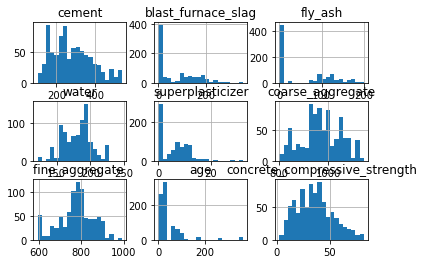

In [44]:
strat_train_set.hist(bins=20)
plt.show()

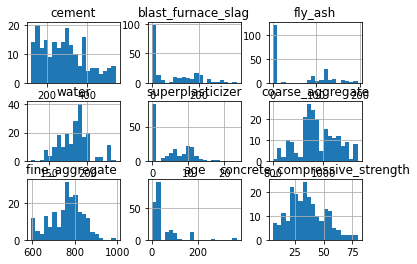

In [45]:
strat_test_set.hist(bins=20)
plt.show()

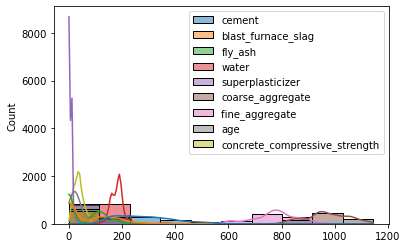

In [52]:
sns.histplot(strat_train_set,kde=True,bins=10)
plt.show()

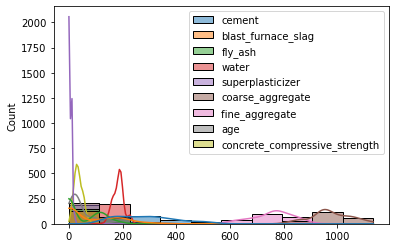

In [53]:

sns.histplot(strat_test_set,kde=True,bins=10)
plt.show()

# ----------------------------------------------------------------------------------------------------------------

In [8]:
data = Data.copy()

data.rename(columns={'fine_aggregate ','fine_aggregate'})
#dataframe.rename(columns={'gdp':'log(gdp)'}, inplace=True)

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [11]:
data.rename(columns={'fine_aggregate ':'fine_aggregate'})

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# ----------------------------------------------------------------------------------------------------------------

In [55]:
Train = pd.read_csv("concrete_data_train.csv")
X_Train = Train.drop("concrete_compressive_strength",axis=1)
X_Train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28
1,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56
2,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28
3,250.0,180.0,95.0,159.0,9.5,860.0,800.0,28
4,305.3,203.5,0.0,203.5,0.0,965.4,631.0,7
...,...,...,...,...,...,...,...,...
819,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,28
820,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100
821,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270
822,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,14


In [56]:
Y_Train = Train["concrete_compressive_strength"]
Y_Train

0      29.72
1      55.20
2      39.46
3      67.87
4      25.89
       ...  
819    31.12
820    46.23
821    42.13
822    22.72
823    29.39
Name: concrete_compressive_strength, Length: 824, dtype: float64

In [57]:
Test = pd.read_csv("concrete_data_test.csv")
X_Test= Test.drop("concrete_compressive_strength",axis=1)
X_Test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,500.1,0.0,0.0,200.0,3.0,1124.4,613.2,28
1,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180
2,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28
3,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,28
4,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,14
...,...,...,...,...,...,...,...,...
201,272.6,0.0,89.6,198.7,10.6,931.3,762.2,28
202,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7
203,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
204,310.0,143.0,0.0,168.0,10.0,914.0,804.0,28


In [58]:
Y_Test = Test["concrete_compressive_strength"]
Y_Test

0      44.13
1      39.00
2      28.94
3      18.20
4      33.73
       ...  
201    32.25
202    25.42
203    24.40
204    45.30
205    33.08
Name: concrete_compressive_strength, Length: 206, dtype: float64

# ----------------------------------------------------------------------------------------------------------------

#  Linear Regressor Estimator

In [10]:
linear_estimator = LinearRegression()

In [11]:
## Training the model
linear_estimator.fit(X = X_Train,y=Y_Train)

LinearRegression()

In [12]:
## Accuracy of the Model
linear_estimator.score(X=X_Test,y=Y_Test)

0.5470248895209846

## Gridsearch_linear

In [13]:
parameter = {'fit_intercept':[1e-15 , 1e-3 , 1e-2 , 1,5,10,20,30,40,50]}

In [14]:
parameter = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [15]:
Gridsearch_linear = GridSearchCV(estimator=linear_estimator,param_grid=parameter,scoring="neg_mean_squared_error",cv=10)

In [16]:
Gridsearch_linear.fit(X = X_Train,y=Y_Train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [17]:
Gridsearch_linear.best_score_

-110.20881547117574

In [18]:
Gridsearch_linear.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [19]:
Gridsearch_linear.score(X=X_Test,y=Y_Test)

-106.46311833699257

# ----------------------------------------------------------------------------------------------------------------

# Random Forest Regressor Estimator

In [31]:
Random_Forest_Estimator = RandomForestRegressor()

In [47]:
## Training the model
Random_Forest_Estimator.fit(X=X_Train,y=Y_Train)

RandomForestRegressor()

In [48]:
## Accuracy of the Model
Random_Forest_Estimator.score(X=X_Test,y=Y_Test)

0.92215045666402

In [ ]:
Gridsearch_Random_Forest = GridSearchCV(estimator=Random_Forest_Estimator)

# ----------------------------------------------------------------------------------------------------------------

# AdaBoost Regressor Estimator

In [59]:
AdaBoost_Estimator = AdaBoostRegressor()

In [60]:
## Training the model
AdaBoost_Estimator.fit(X=X_Train,y=Y_Train)

AdaBoostRegressor()

In [61]:
## Accuracy of the Model
AdaBoost_Estimator.score(X=X_Test,y=Y_Test)

0.7871159819943856

## Gridsearch Adaboost

In [63]:
Gridsearch_Adaboost = GridSearchCV(estimator=AdaBoost_Estimator,param_grid=parameters_Adaboost)

In [62]:
parameters_Adaboost = {"n_estimators":[50,30,60,80],
                        "learning_rate":[1.0,0.005,0.0005,0.001,0.00146],
                        "loss":["linear","square","exponential"]
                      }


In [68]:
Gridsearch_Adaboost.fit(X=X_Train,y=Y_Train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 0.005, 0.0005, 0.001, 0.00146],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 30, 60, 80]})

In [69]:
Gridsearch_Adaboost.best_params_

{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 60}

In [70]:
Gridsearch_Adaboost.score(X=X_Test,y=Y_Test)

0.8028599109570893

# ----------------------------------------------------------------------------------------------------------------

# Gradient Boosting Regressor Estimator

In [20]:
Gradient_Boost_Estimator = GradientBoostingRegressor()

In [21]:
## Training the model
Gradient_Boost_Estimator.fit(X=X_Train,y=Y_Train)

GradientBoostingRegressor()

In [22]:
## Accuracy of the Model
Gradient_Boost_Estimator.score(X=X_Test,y=Y_Test)

0.9138370363874233

# Gridsearch_GradientBoost

In [23]:
parameters_Gradient = { 
    "max_depth":[2,4,6,8,10],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4]
             }

In [24]:
Gridsearch_GradientBoost = GridSearchCV(estimator=Gradient_Boost_Estimator,param_grid=parameters_Gradient)

In [25]:
Gridsearch_GradientBoost.fit(X=X_Train,y=Y_Train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [26]:
Gridsearch_GradientBoost.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [27]:
Gridsearch_GradientBoost.best_score_

0.9113204002877362

In [28]:
Gridsearch_GradientBoost.score(X=X_Test,y=Y_Test)

0.9301746236726254

# ----------------------------------------------------------------------------------------------------------------

#  Decision Tree Regressor Estimator

In [30]:
parameters_DecisionTree = { 
    "max_depth":[2,4,6,8,10],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
    "splitter":["best","random"],
    "max_features":["auto","sqrt","log2"]
             }

In [31]:
Decision_Tree_Estimator = DecisionTreeRegressor()

In [34]:
## Training the model
Decision_Tree_Estimator.fit(X=X_Train,y=Y_Train)

DecisionTreeRegressor()

In [35]:
## Accuracy of the Model
Decision_Tree_Estimator.score(X=X_Test,y=Y_Test)

0.8597458059844577

## Grid Search decision Tree

In [36]:
Gridsearch_DecisionTree = GridSearchCV(estimator=Decision_Tree_Estimator,param_grid=parameters_DecisionTree)

In [37]:
Gridsearch_DecisionTree.fit(X=X_Train,y=Y_Train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [38]:
Gridsearch_DecisionTree.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [39]:
Gridsearch_DecisionTree.score(X=X_Test,y=Y_Test)

0.8189010574862279

# ----------------------------------------------------------------------------------------------------------------

# Support Vector Estimator

In [35]:
SVR_Estimator = SVR()

In [55]:
## Training the model
SVR_Estimator.fit(X=X_Train,y=Y_Train)

SVR()

In [56]:
## Accuracy of the Model
SVR_Estimator.score(X=X_Test,y=Y_Test)

0.2313590247028895